In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import holidays
import datetime
from sklearn.model_selection import train_test_split
%matplotlib inline

2 Cells below is relevant only when activating on cloud / Linux machine.
Since on Windows  google.colab not working


from google.colab import files
uploaded = files.upload()

import io
DataFrame = pd.read_csv(io.BytesIO(uploaded['Crimes_-_2020.csv']))
DataFrame

Update csv data bease:
https://drive.google.com/file/d/1s5lavM_C9aLsgdFzUmXOfbh_XvSxl-G4/view?usp=sharing

In [2]:
DataFrame = pd.read_csv("Crimes_-_2019_to_Present.csv")

In [3]:
DataFrame.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [4]:
Sunrise = pd.read_csv('sunrise-chicago.csv')


In [5]:
# Add converted columns
Sunrise['dtsunset']=Sunrise.apply(lambda x: datetime.datetime.combine(pd.to_datetime(x['date']), pd.to_datetime(x['sunset']).time()), axis=1)
Sunrise['dtsunrise']=Sunrise.apply(lambda x: datetime.datetime.combine(pd.to_datetime(x['date']), pd.to_datetime(x['sunrise']).time()), axis=1)
Sunrise.set_index(['date'], inplace=True)

In [6]:
# a constant defining the time between sunset and darkness
delta_sunset = datetime.timedelta(0,3600)
#TODO: check exact delta, set another constant for sunrise time



In [7]:
# Accepts datetime in string, returns boolean if it's in night time
def is_dark(datecol) :
  d = pd.to_datetime(datecol)
  row = Sunrise.loc[d.strftime("%Y-%m-%d")]
  return d < row['dtsunrise'] or d > (row['dtsunset'] + delta_sunset)

# Add IsDark colunm to DataFrame
# for tests, uncomment the next line and comment the line after it
#DataFrame = DataFrame.head()
#DataFrame['IsDark']=DataFrame.apply(lambda x: is_dark(x['Date']) ,axis=1)

Based on link below, we shall use FBI code instead of IUCR .
http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html#N04A
For example :

> **FBI code** - Homicide 1st & 2nd Degree - 01A

> **IUCR** 
*  0110 HOMICIDE FIRST DEGREE MURDER
*  0130 HOMICIDE SECOND DEGREE MURDER

> **FBI code** - Nonvoluntary Manslaughter - 01B

> **IUCR** 
*    0141 HOMICIDE INVOLUNTARY MANSLAUGHTER
*    0142 HOMICIDE RECKLESS HOMICIDE

In [8]:
DataFrame

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,136,11630494,JC194484,03/19/2019 04:30:00 PM,040XX W FOSTER AVE,0890,THEFT,FROM BUILDING,GROCERY FOOD STORE,False,...,39.0,13.0,06,NaN,NaN,2019,03/26/2019 04:15:20 PM,NaN,NaN,NaN
1,148,11630497,JC193763,03/19/2019 09:00:00 AM,015XX W 17TH ST,0820,THEFT,$500 AND UNDER,STREET,False,...,25.0,31.0,06,NaN,NaN,2019,03/26/2019 04:15:20 PM,NaN,NaN,NaN
2,258,11635490,JC199812,02/11/2019 05:50:00 PM,020XX N spaulding ave,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,...,26.0,22.0,06,NaN,NaN,2019,03/27/2019 04:10:11 PM,NaN,NaN,NaN
3,279,11634522,JC199087,03/20/2019 07:00:00 PM,022XX W PRATT BLVD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,50.0,2.0,14,NaN,NaN,2019,03/27/2019 04:10:11 PM,NaN,NaN,NaN
4,286,11632505,JC196841,03/20/2019 01:00:00 AM,013XX W HOOD AVE,0810,THEFT,OVER $500,OTHER,False,...,48.0,77.0,06,NaN,NaN,2019,03/27/2019 04:10:11 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428907,7217672,11700037,JC278815,05/26/2019 12:10:00 AM,046XX W MC LEAN AVE,0460,BATTERY,SIMPLE,RESIDENCE,True,...,36.0,19.0,08B,1145043.0,1913219.0,2019,06/30/2019 03:56:27 PM,41.917879,-87.742535,"(41.917879493, -87.742535496)"
428908,7217673,11703089,JC282400,05/26/2019 11:29:00 AM,021XX W GRACE ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,OTHER,False,...,47.0,5.0,11,NaN,NaN,2019,06/02/2019 04:09:42 PM,NaN,NaN,NaN
428909,7217674,11700926,JC279725,05/26/2019 05:13:00 PM,036XX W DOUGLAS BLVD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,...,24.0,29.0,26,1152126.0,1893208.0,2019,06/30/2019 03:56:27 PM,41.862830,-87.717040,"(41.862830429, -87.717040084)"
428910,7217675,24560,JC279072,05/26/2019 06:48:00 AM,013XX W HASTINGS ST,0110,HOMICIDE,FIRST DEGREE MURDER,CHA PARKING LOT,True,...,25.0,28.0,01A,1167752.0,1893853.0,2019,06/20/2020 03:48:45 PM,41.864278,-87.659660,"(41.864278228, -87.659660218)"


In [9]:
DataFrame.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

**dt0 - Seasons numeric**

*   4- Fall   - Lowest crime rate
*   3- Summer - Highest crime rate

*   2- Spring
*   1- Winter

**dt1 - Weekday numeric**
 The day of the week with Monday=0, Sunday=6 
 
**dt2 - Weekday string** 

*  Sunday - Highest rate crimes
*  Tuesday - Lowest rate crimes


   
    


In [10]:
dtTemp = DataFrame.copy()

In [11]:
dtTemp.isnull().sum()

Unnamed: 0                 0
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    2000
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      22
Community Area             0
FBI Code                   0
X Coordinate            5620
Y Coordinate            5620
Year                       0
Updated On                 0
Latitude                5620
Longitude               5620
Location                5620
dtype: int64

In [12]:
us_holidays = []
for date in holidays.UnitedStates(years=2019).items():
    us_holidays.append(str(date[0]))
for date in holidays.UnitedStates(years=2020).items():
    us_holidays.append(str(date[0]))
    
print(us_holidays)

['2019-01-01', '2019-01-21', '2019-02-18', '2019-05-27', '2019-07-04', '2019-09-02', '2019-10-14', '2019-11-11', '2019-11-28', '2019-12-25', '2020-01-01', '2020-01-20', '2020-02-17', '2020-05-25', '2020-07-04', '2020-07-03', '2020-09-07', '2020-10-12', '2020-11-11', '2020-11-26', '2020-12-25']


In [13]:
dt0 = dtTemp.copy()
dt0.drop(['ID', 'Case Number', 'Updated On', 'Block', 'IUCR', 'Description', 'Domestic','Arrest', 'Beat', 'Location', 'X Coordinate', 'Y Coordinate', 'Ward', 'FBI Code'], 1, inplace=True)
#dt0["Arrest"] = dt0["Arrest"].astype(int)
#dt0["Domestic"] = dt0["Domestic"].astype(int)
#dt0["FBI Code"] = (DataFrame["FBI Code"]).apply(lambda x: int(x, 16))
dt0["Season"] = (pd.to_datetime(dt0['Date'], format="%m/%d/%Y %I:%M:%S %p").dt.month%12 + 3)//3
#dt0["WeekdayR"] = pd.to_datetime(dt0['Date'], format="%m/%d/%Y %I:%M:%S %p").dt.dayofweek
dt0["Weekday"] = pd.to_datetime(dt0['Date']).dt.day_name()
dt0["Just_Date"] = (pd.to_datetime(dt0['Date'])).dt.date
dt0["Is_Holiday"] = [ 1 if str(val).split()[0] in us_holidays else 0 for val in dt0["Just_Date"]]
dt0["Day_of_Month"] = pd.to_datetime(dt0["Just_Date"]).dt.day
dt0["MonthR"] = pd.to_datetime(dt0["Just_Date"]).dt.month
dt0["Month"] = pd.to_datetime(dt0["Just_Date"]).dt.month_name()
dt0["IsDark"]= DataFrame.apply(lambda x: is_dark(x['Date']) ,axis=1)
dt0["IsDark"]= dt0["IsDark"].astype(int)

In [14]:
dt0["District"].value_counts()

11.0    30550
6.0     28185
8.0     26093
4.0     23765
7.0     23295
18.0    22312
1.0     22129
25.0    21810
3.0     21283
12.0    21239
10.0    20675
5.0     19543
19.0    19260
2.0     18660
9.0     18379
15.0    17193
14.0    14554
22.0    13728
16.0    13725
24.0    13396
17.0    11521
20.0     7608
31.0        9
Name: District, dtype: int64

In [15]:
dt0

,Unnamed: 0,Date,Primary Type,Location Description,District,Community Area,Year,Latitude,Longitude,Season,Weekday,Just_Date,Is_Holiday,Day_of_Month,MonthR,Month,IsDark
0,136,03/19/2019 04:30:00 PM,THEFT,GROCERY FOOD STORE,17.0,13.0,2019,NaN,NaN,2,Tuesday,2019-03-19,0,19,3,March,0
1,148,03/19/2019 09:00:00 AM,THEFT,STREET,12.0,31.0,2019,NaN,NaN,2,Tuesday,2019-03-19,0,19,3,March,0
2,258,02/11/2019 05:50:00 PM,THEFT,RESIDENTIAL YARD (FRONT/BACK),14.0,22.0,2019,NaN,NaN,1,Monday,2019-02-11,0,11,2,February,0
3,279,03/20/2019 07:00:00 PM,CRIMINAL DAMAGE,STREET,24.0,2.0,2019,NaN,NaN,2,Wednesday,2019-03-20,0,20,3,March,0
4,286,03/20/2019 01:00:00 AM,THEFT,OTHER,24.0,77.0,2019,NaN,NaN,2,Wednesday,2019-03-20,0,20,3,March,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428907,7217672,05/26/2019 12:10:00 AM,BATTERY,RESIDENCE,25.0,19.0,2019,41.917879,-87.742535,2,Sunday,2019-05-26,0,26,5,May,1
428908,7217673,05/26/2019 11:29:00 AM,DECEPTIVE PRACTICE,OTHER,19.0,5.0,2019,NaN,NaN,2,Sunday,2019-05-26,0,26,5,May,0
428909,7217674,05/26/2019 05:13:00 PM,OTHER OFFENSE,APARTMENT,10.0,29.0,2019,41.862830,-87.717040,2,Sunday,2019-05-26,0,26,5,May,0
428910,7217675,05/26/2019 06:48:00 AM,HOMICIDE,CHA PARKING LOT,12.0,28.0,2019,41.864278,-87.659660,2,Sunday,2019-05-26,0,26,5,May,0


In [16]:
dt0.columns

Index(['Unnamed: 0', 'Date', 'Primary Type', 'Location Description',
       'District', 'Community Area', 'Year', 'Latitude', 'Longitude', 'Season',
       'Weekday', 'Just_Date', 'Is_Holiday', 'Day_of_Month', 'MonthR', 'Month',
       'IsDark'],
      dtype='object')

In [17]:
dt0.shape

(428912, 17)

Creating a map from  "Community Area" to map coordinates

In [18]:
community_area_dict = dict()

for i in range(1,78):
    area_df = DataFrame[DataFrame["Community Area"]==i]
    vc = area_df["Block"].value_counts()
    max_block = vc.head(1).index[0]
    block_df = area_df[area_df["Block"]==max_block]
    var = block_df["Location"].iloc[0]
    count = 1
    while pd.isnull(var):
        var = block_df["Location"].iloc[count]
        count+=1
    community_area_dict[i] = var

In [19]:
dt0.describe()

,Unnamed: 0,District,Community Area,Year,Latitude,Longitude,Season,Is_Holiday,Day_of_Month,MonthR,IsDark
count,4.289120e+05,428912.000000,428912.000000,428912.000000,423292.000000,423292.000000,428912.000000,428912.000000,428912.000000,428912.000000,428912.000000
mean,4.946217e+05,11.158336,36.947679,2019.392987,41.842294,-87.669875,2.504584,0.027798,15.450981,6.099529,0.370043
std,5.083579e+05,6.943857,21.438985,0.488415,0.086948,0.059346,1.062134,0.164395,8.839112,3.204726,0.482817
min,1.360000e+02,1.000000,1.000000,2019.000000,36.619446,-91.686566,1.000000,0.000000,1.000000,1.000000,0.000000
25%,1.742878e+05,6.000000,23.000000,2019.000000,41.767229,-87.712674,2.000000,0.000000,8.000000,3.000000,0.000000
50%,2.841175e+05,10.000000,32.000000,2019.000000,41.860432,-87.663541,3.000000,0.000000,15.000000,6.000000,0.000000
75%,3.945352e+05,17.000000,54.000000,2020.000000,41.903776,-87.627626,3.000000,0.000000,23.000000,9.000000,1.000000
max,7.217678e+06,31.000000,77.000000,2020.000000,42.022586,-87.524529,4.000000,1.000000,31.000000,12.000000,1.000000


creating dummy variables for dataframe

In [20]:
dt1 = pd.get_dummies(dt0, columns=["Weekday", "Month", "Community Area", "Season"])
dt1.drop(["Date", "Just_Date", "Day_of_Month"], 1, inplace=True)
dt1

,Unnamed: 0,Primary Type,Location Description,District,Year,Latitude,Longitude,Is_Holiday,MonthR,IsDark,...,Community Area_72.0,Community Area_73.0,Community Area_74.0,Community Area_75.0,Community Area_76.0,Community Area_77.0,Season_1,Season_2,Season_3,Season_4
0,136,THEFT,GROCERY FOOD STORE,17.0,2019,NaN,NaN,0,3,0,...,0,0,0,0,0,0,0,1,0,0
1,148,THEFT,STREET,12.0,2019,NaN,NaN,0,3,0,...,0,0,0,0,0,0,0,1,0,0
2,258,THEFT,RESIDENTIAL YARD (FRONT/BACK),14.0,2019,NaN,NaN,0,2,0,...,0,0,0,0,0,0,1,0,0,0
3,279,CRIMINAL DAMAGE,STREET,24.0,2019,NaN,NaN,0,3,0,...,0,0,0,0,0,0,0,1,0,0
4,286,THEFT,OTHER,24.0,2019,NaN,NaN,0,3,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428907,7217672,BATTERY,RESIDENCE,25.0,2019,41.917879,-87.742535,0,5,1,...,0,0,0,0,0,0,0,1,0,0
428908,7217673,DECEPTIVE PRACTICE,OTHER,19.0,2019,NaN,NaN,0,5,0,...,0,0,0,0,0,0,0,1,0,0
428909,7217674,OTHER OFFENSE,APARTMENT,10.0,2019,41.862830,-87.717040,0,5,0,...,0,0,0,0,0,0,0,1,0,0
428910,7217675,HOMICIDE,CHA PARKING LOT,12.0,2019,41.864278,-87.659660,0,5,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
ndf1 = dt1.groupby(['Is_Holiday', 'IsDark', 'Weekday_Friday', 'Weekday_Thursday','Weekday_Wednesday','Weekday_Tuesday','Weekday_Monday','Weekday_Sunday','Weekday_Saturday', 'Season_1','Season_2',	'Season_3',	'Season_4', 'Month_January', 'Month_February', 'Month_March', 'Month_April','Month_May', 'Month_June', 'Month_July', 'Month_August', 'Month_September','Month_October', 'Month_November', 'Month_December', 'Community Area_1.0', 'Community Area_2.0', 'Community Area_3.0', 'Community Area_4.0', 'Community Area_5.0', 'Community Area_6.0', 'Community Area_7.0', 'Community Area_8.0', 'Community Area_9.0',  'Community Area_10.0', 'Community Area_11.0', 'Community Area_12.0', 'Community Area_13.0', 'Community Area_14.0', 'Community Area_15.0', 'Community Area_16.0', 'Community Area_17.0',  'Community Area_18.0','Community Area_19.0', 'Community Area_20.0',  'Community Area_21.0', 'Community Area_22.0', 'Community Area_23.0', 'Community Area_24.0', 'Community Area_25.0', 'Community Area_26.0', 'Community Area_27.0', 'Community Area_28.0', 'Community Area_29.0', 'Community Area_30.0', 'Community Area_31.0', 'Community Area_32.0', 'Community Area_33.0', 'Community Area_34.0', 'Community Area_35.0', 'Community Area_36.0', 'Community Area_37.0', 'Community Area_38.0', 'Community Area_39.0', 'Community Area_40.0', 'Community Area_41.0', 'Community Area_42.0', 'Community Area_43.0', 'Community Area_44.0', 'Community Area_45.0',  'Community Area_46.0', 'Community Area_47.0', 'Community Area_48.0', 'Community Area_49.0', 'Community Area_50.0', 'Community Area_51.0', 'Community Area_52.0', 'Community Area_53.0', 'Community Area_54.0', 'Community Area_55.0', 'Community Area_56.0', 'Community Area_57.0', 'Community Area_58.0', 'Community Area_59.0', 'Community Area_60.0', 'Community Area_61.0', 'Community Area_62.0', 'Community Area_63.0', 'Community Area_64.0', 'Community Area_65.0',  'Community Area_66.0', 'Community Area_67.0', 'Community Area_68.0', 'Community Area_69.0', 'Community Area_70.0', 'Community Area_71.0', 'Community Area_72.0', 'Community Area_73.0','Community Area_74.0', 'Community Area_75.0', 'Community Area_76.0', 'Community Area_77.0' ]).size().reset_index(name='Counts')
ndf1

,Is_Holiday,IsDark,Weekday_Friday,Weekday_Thursday,Weekday_Wednesday,Weekday_Tuesday,Weekday_Monday,Weekday_Sunday,Weekday_Saturday,Season_1,...,Community Area_69.0,Community Area_70.0,Community Area_71.0,Community Area_72.0,Community Area_73.0,Community Area_74.0,Community Area_75.0,Community Area_76.0,Community Area_77.0,Counts
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,21
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,13
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,8
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,5
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14665,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14666,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
14667,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [22]:
ndf = dt0.groupby(['Is_Holiday', 'Day_of_Month', 'Weekday', 'Season', 'IsDark']).size().reset_index(name='Counts')
ndf


,Is_Holiday,Day_of_Month,Weekday,Season,IsDark,Counts
0,0,1,Friday,1,0,402
1,0,1,Friday,1,1,363
2,0,1,Friday,2,0,809
3,0,1,Friday,2,1,471
4,0,1,Friday,4,0,481
...,...,...,...,...,...,...
1019,1,25,Wednesday,1,1,298
1020,1,27,Monday,2,0,495
1021,1,27,Monday,2,1,252
1022,1,28,Thursday,4,0,235


In [23]:
ndf.describe()

,Is_Holiday,Day_of_Month,Season,IsDark,Counts
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,0.035156,15.544922,2.388672,0.500000,418.859375
std,0.184265,8.795823,1.123511,0.500244,213.611719
min,0.000000,1.000000,1.000000,0.000000,116.000000
25%,0.000000,8.000000,1.000000,0.000000,281.000000
50%,0.000000,15.000000,2.000000,0.500000,358.000000
75%,0.000000,23.000000,3.000000,1.000000,476.000000
max,1.000000,31.000000,4.000000,1.000000,1616.000000


In [24]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Is_Holiday    1024 non-null   int64 
 1   Day_of_Month  1024 non-null   int64 
 2   Weekday       1024 non-null   object
 3   Season        1024 non-null   int64 
 4   IsDark        1024 non-null   int64 
 5   Counts        1024 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 48.1+ KB


In [25]:
ndf1.describe()

,Is_Holiday,IsDark,Weekday_Friday,Weekday_Thursday,Weekday_Wednesday,Weekday_Tuesday,Weekday_Monday,Weekday_Sunday,Weekday_Saturday,Season_1,...,Community Area_69.0,Community Area_70.0,Community Area_71.0,Community Area_72.0,Community Area_73.0,Community Area_74.0,Community Area_75.0,Community Area_76.0,Community Area_77.0,Counts
count,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000,...,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000,14669.000000
mean,0.122435,0.498671,0.134774,0.142955,0.143364,0.135251,0.183380,0.125639,0.134638,0.267298,...,0.013225,0.013089,0.013225,0.012748,0.013157,0.012066,0.013157,0.012816,0.013157,29.239348
std,0.327799,0.500015,0.341494,0.350038,0.350455,0.342003,0.386991,0.331453,0.341348,0.442564,...,0.114242,0.113659,0.114242,0.112189,0.113951,0.109186,0.113951,0.112484,0.113951,32.800039
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,304.000000


In [26]:
ndf1.info

<bound method DataFrame.info of        Is_Holiday  IsDark  Weekday_Friday  Weekday_Thursday  \
0               0       0               0                 0   
1               0       0               0                 0   
2               0       0               0                 0   
3               0       0               0                 0   
4               0       0               0                 0   
...           ...     ...             ...               ...   
14664           1       1               1                 0   
14665           1       1               1                 0   
14666           1       1               1                 0   
14667           1       1               1                 0   
14668           1       1               1                 0   

       Weekday_Wednesday  Weekday_Tuesday  Weekday_Monday  Weekday_Sunday  \
0                      0                0               0               0   
1                      0                0               0

In [27]:
dt2 = pd.get_dummies(dt0, columns=[ "District","Weekday", "Month", "Season"])
#dt2.drop(["Unnamed: 0","Primary Type", "Location Description",  "Date", "Just_Date", "Day_of_Month", "Community Area"], 1, inplace=True)
dt2

,Unnamed: 0,Date,Primary Type,Location Description,Community Area,Year,Latitude,Longitude,Just_Date,Is_Holiday,...,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Season_1,Season_2,Season_3,Season_4
0,136,03/19/2019 04:30:00 PM,THEFT,GROCERY FOOD STORE,13.0,2019,NaN,NaN,2019-03-19,0,...,0,1,0,0,0,0,0,1,0,0
1,148,03/19/2019 09:00:00 AM,THEFT,STREET,31.0,2019,NaN,NaN,2019-03-19,0,...,0,1,0,0,0,0,0,1,0,0
2,258,02/11/2019 05:50:00 PM,THEFT,RESIDENTIAL YARD (FRONT/BACK),22.0,2019,NaN,NaN,2019-02-11,0,...,0,0,0,0,0,0,1,0,0,0
3,279,03/20/2019 07:00:00 PM,CRIMINAL DAMAGE,STREET,2.0,2019,NaN,NaN,2019-03-20,0,...,0,1,0,0,0,0,0,1,0,0
4,286,03/20/2019 01:00:00 AM,THEFT,OTHER,77.0,2019,NaN,NaN,2019-03-20,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428907,7217672,05/26/2019 12:10:00 AM,BATTERY,RESIDENCE,19.0,2019,41.917879,-87.742535,2019-05-26,0,...,0,0,1,0,0,0,0,1,0,0
428908,7217673,05/26/2019 11:29:00 AM,DECEPTIVE PRACTICE,OTHER,5.0,2019,NaN,NaN,2019-05-26,0,...,0,0,1,0,0,0,0,1,0,0
428909,7217674,05/26/2019 05:13:00 PM,OTHER OFFENSE,APARTMENT,29.0,2019,41.862830,-87.717040,2019-05-26,0,...,0,0,1,0,0,0,0,1,0,0
428910,7217675,05/26/2019 06:48:00 AM,HOMICIDE,CHA PARKING LOT,28.0,2019,41.864278,-87.659660,2019-05-26,0,...,0,0,1,0,0,0,0,1,0,0


In [130]:
ndf2 = dt2.groupby(['Year','MonthR','Day_of_Month','Is_Holiday',
                    'IsDark', 'Weekday_Friday', 'Weekday_Thursday','Weekday_Wednesday',
                    'Weekday_Tuesday','Weekday_Monday','Weekday_Sunday','Weekday_Saturday', 
                    'Season_1','Season_2',	'Season_3',	'Season_4', 
                    'Month_January', 'Month_February', 'Month_March',
                    'Month_April','Month_May', 'Month_June', 'Month_July',
                    'Month_August', 'Month_September','Month_October', 'Month_November', 
                    'Month_December', 'District_1.0', 'District_2.0', 'District_3.0', 
                    'District_4.0', 'District_5.0', 'District_6.0', 'District_7.0', 
                    'District_8.0', 'District_9.0', 'District_10.0', 'District_11.0',
                    'District_12.0',  'District_14.0','District_15.0',  'District_16.0', 
                    'District_17.0',  'District_18.0','District_19.0', 'District_20.0', 
                    'District_22.0', 'District_24.0', 'District_25.0',
                    'District_31.0']).size().reset_index(name='Counts')
ndf2

,Year,MonthR,Day_of_Month,Is_Holiday,IsDark,Weekday_Friday,Weekday_Thursday,Weekday_Wednesday,Weekday_Tuesday,Weekday_Monday,...,District_16.0,District_17.0,District_18.0,District_19.0,District_20.0,District_22.0,District_24.0,District_25.0,District_31.0,Counts
0,2019,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,14
1,2019,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,13
2,2019,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,14
3,2019,1,1,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,6
4,2019,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28922,2020,10,19,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8
28923,2020,10,19,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7
28924,2020,10,19,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10
28925,2020,10,19,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4


In [132]:
ndfR = dt2.groupby(['Is_Holiday',
                    'IsDark', 'Weekday_Friday', 'Weekday_Thursday','Weekday_Wednesday',
                    'Weekday_Tuesday','Weekday_Monday','Weekday_Sunday','Weekday_Saturday', 
                    'Season_1','Season_2',	'Season_3',	'Season_4', 
                    'Month_January', 'Month_February', 'Month_March',
                    'Month_April','Month_May', 'Month_June', 'Month_July',
                    'Month_August', 'Month_September','Month_October', 'Month_November', 
                    'Month_December', 'District_1.0', 'District_2.0', 'District_3.0', 
                    'District_4.0', 'District_5.0', 'District_6.0', 'District_7.0', 
                    'District_8.0', 'District_9.0', 'District_10.0', 'District_11.0',
                    'District_12.0',  'District_14.0','District_15.0',  'District_16.0', 
                    'District_17.0',  'District_18.0','District_19.0', 'District_20.0', 
                    'District_22.0', 'District_24.0', 'District_25.0',
                    'District_31.0']).size().reset_index(name='Counts')
ndfR

,Is_Holiday,IsDark,Weekday_Friday,Weekday_Thursday,Weekday_Wednesday,Weekday_Tuesday,Weekday_Monday,Weekday_Sunday,Weekday_Saturday,Season_1,...,District_16.0,District_17.0,District_18.0,District_19.0,District_20.0,District_22.0,District_24.0,District_25.0,District_31.0,Counts
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,79
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,59
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,47
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,39
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4273,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4274,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
4275,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


START DECISION TREE MODELING

In [29]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split
#from sklearn import tree

In [30]:
#X = ndf.drop('Counts', axis = 1)
#Y = ndf['Counts']

In [31]:
#x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.2)


In [32]:
#classifier= DecisionTreeClassifier()
#classifier.fit(x_train, y_train)

In [33]:
#y_pred = classifier.predict(x_test)

In [34]:
#from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test, y_pred))

In [35]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))

END DECISION TREE MODELING

START  RANDOM FOREST TREE CLASSIFICATION  MODELING
based on:
https://www.youtube.com/watch?v=eM4uJ6XGnSM

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
#ndf["Is_Train"]= np.random.uniform(0,1,len(ndf))<=0.75
#ndf

In [38]:
#null_counts = ndf.isnull().sum()
#null_counts[null_counts>0]

In [39]:
#train, test = ndf[ndf["Is_Train"]==True], ndf[ndf["Is_Train"]==False]
#print('number of train data: ', len(train))
#print('number of test data: ', len(test))

In [40]:
#features=ndf.columns[:5]
#features

In [41]:
#y = pd.factorize(train['Counts'])[0]

In [42]:
#clf = RandomForestClassifier(n_jobs=2, random_state=0)
#clf.fit(train[features], y)

In [43]:
#clf.predict(test[features])

END  RANDOM FOREST TREE CLASSIFICATION  MODELING

START  RANDOM FOREST TREE REGRESSION  MODELING
based on:
https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

#Use only dummy variables for weekday, month,season

#Labels are the values we want to predict

In [145]:
labels = np.array(ndf2['Counts'])
labelsR = np.array(ndfR['Counts'])

#Remove the labels from the features
#axis 1 refers to the columns

In [146]:
features= ndf2.drop('Counts', axis = 1)
featuresR= ndfR.drop('Counts', axis = 1)
type(features)

pandas.core.frame.DataFrame

#Saving feature names for later use

In [147]:
features_list = list(features.columns)
featuresR_list = list(featuresR.columns)


#Convert to numpy array

In [148]:
features = np.array(features)
featuresR = np.array(featuresR)
type(features)

numpy.ndarray

#Split the data into training and testing sets

In [149]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)
train_featuresR, test_featuresR, train_labelsR, test_labelsR = train_test_split(featuresR, labelsR, test_size = 0.20, random_state = 42)

In [150]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

print('Training FeaturesR Shape:', train_featuresR.shape)
print('Training LabelsR Shape:', train_labelsR.shape)
print('Testing FeaturesR Shape:', test_featuresR.shape)
print('Testing LabelsR Shape:', test_labelsR.shape)

Training Features Shape: (23141, 51)
Training Labels Shape: (23141,)
Testing Features Shape: (5786, 51)
Testing Labels Shape: (5786,)
Training FeaturesR Shape: (3421, 48)
Training LabelsR Shape: (3421,)
Testing FeaturesR Shape: (856, 48)
Testing LabelsR Shape: (856,)


Establish Baseline

Before we can make and evaluate predictions, we need to establish a baseline, a sensible measure that we hope to beat with our model. If our model cannot improve upon the baseline, then it will be a failure and we should try a different model or admit that machine learning is not right for our problem. The baseline prediction for our case can be the historical max temperature averages. In other words, our baseline is the error we would get if we simply predicted the average max temperature for all days.

For Tree modeling add average crime count
per each day of week 



In [151]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rfR = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);
rfR.fit(train_featuresR, train_labelsR);

In [152]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
predictionsR = rfR.predict(test_featuresR)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
errorsR = abs(predictionsR - test_labelsR)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('Mean Absolute Error:', round(np.mean(errorsR), 2), 'degrees.')

Mean Absolute Error: 3.61 degrees.
Mean Absolute Error: 12.57 degrees.


Determine Performance Metrics

To put our predictions in perspective, we can calculate an accuracy using the mean average percentage error subtracted from 100 %.


In [141]:

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
mapeR = 100 * (errorsR / test_labelsR)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
accuracyR = 100 - np.mean(mapeR)
print('Accuracy:', round(accuracy, 2), '%.')
print('AccuracyR:', round(accuracyR, 2), '%.')

Accuracy: 66.73 %.
AccuracyR: 82.65 %.


Visualizing a Single Decision Tree
One of the coolest parts of the Random Forest implementation in Skicit-learn is we can actually examine any of the trees in the forest. We will select one tree, and save the whole tree as an image.
The following code takes one tree from the forest and saves it as an image.


In [142]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
treeR = rfR.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
treeR = rfR.estimators_[5]


In [143]:
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = features_list, rounded = True, precision = 1)
export_graphviz(treeR, out_file = 'treeR.dot', featureR_names = featuresR_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
(graph, ) = pydot.graph_from_dot_file('treeR.dot')
# Write graph to a png file
graph.write_png('C:/Users/bdl011/source/repos/Hackathon-ML/ChicagoCrime-MSI/tree.png')
graph.write_png('C:/Users/bdl011/source/repos/Hackathon-ML/ChicagoCrime-MSI/treeR.png')

NameError: name 'featuresR_list' is not defined

In [55]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 43


In [56]:


# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = features_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('C:/Users/bdl011/source/repos/Hackathon-ML/ChicagoCrime-MSI/small_tree.png');



In [115]:
# Get numerical feature importances
importances = list(rf.feature_importances_)# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: IsDark               Importance: 0.2
Variable: Day_of_Month         Importance: 0.14
Variable: MonthR               Importance: 0.05
Variable: District_11.0        Importance: 0.05
Variable: District_20.0        Importance: 0.05
Variable: Year                 Importance: 0.04
Variable: Season_1             Importance: 0.03
Variable: District_1.0         Importance: 0.03
Variable: District_6.0         Importance: 0.03
Variable: Weekday_Sunday       Importance: 0.02
Variable: Weekday_Saturday     Importance: 0.02
Variable: Season_3             Importance: 0.02
Variable: District_8.0         Importance: 0.02
Variable: District_17.0        Importance: 0.02
Variable: District_18.0        Importance: 0.02
Variable: Weekday_Friday       Importance: 0.01
Variable: Weekday_Thursday     Importance: 0.01
Variable: Weekday_Wednesday    Importance: 0.01
Variable: Weekday_Tuesday      Importance: 0.01
Variable: Weekday_Monday       Importance: 0.01
Variable: Season_2             Importance

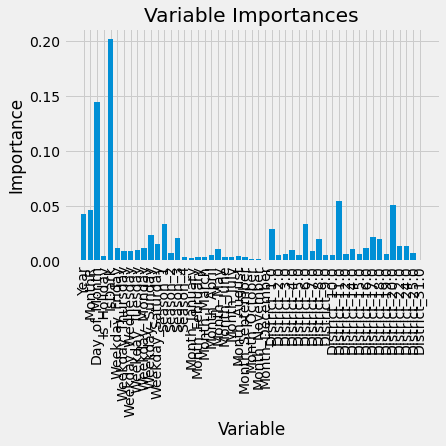

In [116]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
#import matplotlib.pyplot as plt%matplotlib inline
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, features_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Variable Importances');

In [117]:
# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
# Dates of training values
months = features[:, features_list.index('MonthR')]
days = features[:, features_list.index('Day_of_Month')]
years = features[:, features_list.index('Year')]


In [122]:

# List and then convert to datetime object
dates = [str(int(Year)) + '-' + str(int(MonthR)) + '-' + str(int(Day_of_Month)) for Year, MonthR, Day_of_Month in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]



list

Plot the entire dataset with predictions highlighted.

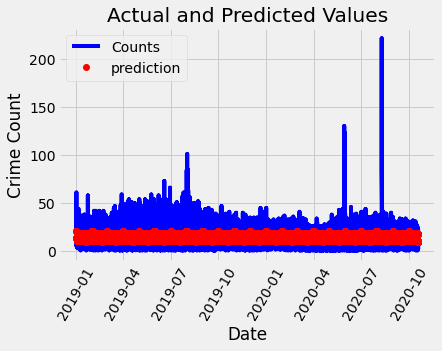

In [119]:
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'Counts': labels})
# Dates of predictions
months = test_features[:, features_list.index('MonthR')]
days = test_features[:, features_list.index('Day_of_Month')]
years = test_features[:, features_list.index('Year')]
# Column of dates
test_dates = [str(int(Year)) + '-' + str(int(MonthR)) + '-' + str(int(WeekdayR)) for Year, MonthR, WeekdayR in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

#fig = plt.figure(figsize=(20, 2))
#plt = fig.add_subplot(111)


# Plot the actual values
plt.plot(true_data['date'], true_data['Counts'], 'b-', label = 'Counts')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); 
plt.title('Actual and Predicted Values');

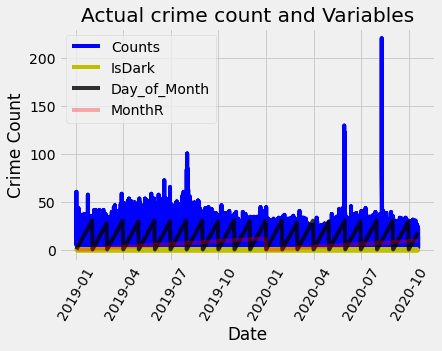

In [120]:
# Make the data accessible for plotting
true_data['IsDark'] = features[:, features_list.index('IsDark')]
true_data['Day_of_Month'] = features[:, features_list.index('Day_of_Month')]
true_data['MonthR'] = features[:, features_list.index('MonthR')]
# Plot all the data as lines
plt.plot(true_data['date'], true_data['Counts'], 'b-', label  = 'Counts', alpha = 1.0)
plt.plot(true_data['date'], true_data['IsDark'], 'y-', label  = 'IsDark', alpha = 1.0)
plt.plot(true_data['date'], true_data['Day_of_Month'], 'k-', label = 'Day_of_Month', alpha = 0.8)
plt.plot(true_data['date'], true_data['MonthR'], 'r-', label = 'MonthR', alpha = 0.3)

# Formatting plot
plt.legend(); 
plt.xticks(rotation = '60');# Lables and title
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual crime count and Variables');

In [121]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [features_list.index('IsDark'), features_list.index('Day_of_Month')]
                      #features_list.index('MonthR'),
                    #features_list.index('District_11.0'), features_list.index('District_20.0')]


In [98]:
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]


In [99]:
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error


RandomForestRegressor(n_estimators=1000, random_state=42)

In [100]:
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)


In [101]:
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 5.74 degrees.
Accuracy: 37.95 %.


END  RANDOM FOREST TREE REGRESSION  MODELING

Some Plots

In [ ]:
x=np.c_[dt0["FBI Code"]]
y=np.c_[dt0["Day_of_Month"]]
dt0.plot(kind='scatter', x="FBI Code", y='Day_of_Month', alpha=(0.4),figsize=(30,5))
plt.show()

In [ ]:
x=np.c_[dt0["FBI Code"]]
y=np.c_[dt0["Date"]]
dt0.plot(kind='scatter', x="FBI Code", y='Date', alpha=(0.4),figsize=(30,5))
plt.show()

In [ ]:
codt1=dt1[dt1["Date"]==6]
codt1.head(3)

In [ ]:
codt1.plot(kind='scatter',x="X Coordinate", y="Y Coordinate", alpha=(0.4),figsize=(20,20),c="Date", cmap=plt.get_cmap("Blues"), colorbar=True, sharex=False)
plt.legend()

In [ ]:
dt2 = DataFrame.copy()
dt2['Date'] = pd.to_datetime(dt2['Date'], format="%m/%d/%Y %I:%M:%S %p").dt.day_name()
dt2

In [ ]:
dt2["Date"].value_counts()

In [ ]:
DataFrame.shape[0]

In [ ]:
DataFrame.shape[1]

In [ ]:
DataFrame["Community Area"].value_counts()

Community Area no. 25 appears 8722 time in the data set

In [ ]:
DataFrame.Description.value_counts()

In [ ]:
DataFrame["Location Description"].value_counts()

In [ ]:
DataFrame.sort_values(by=["Location Description", "Primary Type"])

In [ ]:
DataFrame[(DataFrame["Primary Type"]=="ASSAULT")&(DataFrame["Location Description"]=="STREET")]

In [ ]:
DataFrame.plot(kind='scatter',x="X Coordinate", y="Y Coordinate", alpha=(0.4),figsize=(50,50),c="Community Area", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()

In [ ]:
co.plot(kind='scatter',x="X Coordinate", y="Y Coordinate", alpha=(0.4),figsize=(10,10),c="Community Area", cmap=plt.get_cmap("Blues"), colorbar=True, sharex=False)
plt.legend()

Plot histogram that shows per district the number of total crimes.
Next step would be to create a testing data frame , from 20% of the dataset.
Need to make sure that it would resemble  the distribution of all DataSet

29/10/20 START

In [ ]:
dt0.describe()

In [ ]:
corrMatrix= dt0.corr()
corrMatrix["FBI Code"].sort_values(ascending=True)

29/10/20 What is the most common crime  (6 is the most common crime which is theft)

In [ ]:
dt0["Community Area"].value_counts()

In [ ]:
dt0["FBI Code"].value_counts()

In [ ]:
for6=dt0[dt0["FBI Code"]==6]
for6

In [ ]:
for6["Community Area"].value_counts()

From above area 8 has the highest theft crime. I expected based on below linear regression that 36 area would be the one

In [ ]:
x=np.c_[dt0["FBI Code"]]
y=np.c_[dt0["Community Area"]]
dt0.plot(kind='scatter', x="FBI Code", y='Community Area', alpha=(0.4),figsize=(30,10))
plt.show()

In [ ]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
model.fit(x, y)

In [ ]:
X_new = [[6]]

In [ ]:
print(model.predict(X_new))

In [ ]:
for36=dt0[dt0["Community Area"]==36]
for36

In [ ]:
for36["FBI Code"].value_counts()

In [ ]:
dt0["FBI Code"].value_counts()

In [ ]:
X_new = [[27]]

In [ ]:
print(model.predict(X_new))

29/10/20 END

In [ ]:
DataFrame["Community Area"].value_counts().plot(kind='bar',figsize=(20,5))

In [ ]:
from sklearn.model_selection import train_test_split
train_frame, test_frame = train_test_split(DataFrame)

In [ ]:
test_frame["Community Area"].value_counts().plot(kind='bar',figsize=(20,5))

In [ ]:
train_frame["Community Area"].value_counts().plot(kind='bar',figsize=(20,5))

In [ ]:
len(train_frame)

In [ ]:
len(test_frame)

Convert "FBI Code" Hexa string to numeric value

In [ ]:
dt1['FBI Code'] = (DataFrame["FBI Code"]).apply(lambda x: int(x, 16))
dt1

In [ ]:
from sklearn import linear_model
from sklearn.utils import shuffle

In [ ]:
dt0=dt0[["Date","Arrest","Domestic","Ward","Community Area","FBI Code"]]
dt0

In [ ]:
dt0.info()

In [ ]:
dt0[(dt0["Date"]=="NaN")]

In [ ]:
predict="FBI Code"
X=np.array(dt0.drop([predict],1))

In [ ]:
type(X)

In [ ]:
Y=np.array(dt0[predict])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.1)

In [ ]:
linear=linear_model.LinearRegression()

In [ ]:
dt0

In [ ]:
def clean_dataset(dt0):
    assert isinstance(dt0, pd.DataFrame), "df needs to be a pd.DataFrame"
    dt0.dropna(inplace=True)
    indices_to_keep = ~dt0.isin([np.nan, np.inf, -np.inf]).any(1)
    return dt0[indices_to_keep].astype(np.float64)

In [ ]:
dt0.dropna()